In [0]:
file_location = "/FileStore/tables/vertex-1.csv"
file_type = "csv"

In [0]:
#CSV options
infer_Schema ="false"
first_row_is_header ="false"
delimiter = ","

In [0]:
df = spark.read.format(file_type)\
.option("inferSchema", infer_Schema)\
.option("header", first_row_is_header)\
.option("sep", delimiter)\
.load(file_location)

In [0]:

display(df)

_c0,_c1,_c2
1,Jacob,48
2,Jessica,45
3,Andrew,25
4,Ryan,53
5,Emily,22
6,Lily,52


In [0]:
file_location ="/FileStore/tables/edges.csv"
df1 = spark.read.format(file_type)\
.option("inferSchema", infer_Schema)\
.option("header", first_row_is_header)\
.option("sep",delimiter)\
.load(file_location)

In [0]:
display(df1)


_c0,_c1,_c2
6,1,Sister
1,2,Husband
2,1,Wife
5,1,Daughter
5,2,Daughter
3,1,Son
3,2,Son
4,1,Friend
1,5,Father
1,3,Father


In [0]:
%scala
import org.apache.spark.rdd.RDD

import org.apache.spark.rdd.RDD

In [0]:
%scala
import org.apache.spark.graphx._

import org.apache.spark.graphx._

In [0]:
%scala
val vertexRDD = sc.textFile("/FileStore/tables/vertex-1.csv")

vertexRDD: org.apache.spark.rdd.RDD[String] = /FileStore/tables/vertex-1.csv MapPartitionsRDD[23] at textFile at command-2126645660340504:1

In [0]:
%scala
val edgeRDD = sc.textFile("/FileStore/tables/edges.csv")

edgeRDD: org.apache.spark.rdd.RDD[String] = /FileStore/tables/edges.csv MapPartitionsRDD[25] at textFile at command-2126645660340505:1

In [0]:
%scala
vertexRDD.collect()
edgeRDD.collect()

res0: Array[String] = Array(6,1,Sister, 1,2,Husband, 2,1,Wife, 5,1,Daughter, 5,2,Daughter, 3,1,Son, 3,2,Son, 4,1,Friend, 1,5,Father, 1,3,Father, 2,5,Mother, 2,3,Mother)

In [0]:
%scala
val vertices: RDD[(VertexId, (String,String))]=vertexRDD.map{ 
  line => val fields =line.split(",")
  (fields(0).toLong, (fields(1),fields(2)))}

vertices: org.apache.spark.rdd.RDD[(org.apache.spark.graphx.VertexId, (String, String))] = MapPartitionsRDD[26] at map at command-2126645660340507:1

In [0]:
%scala
vertices.collect()

res1: Array[(org.apache.spark.graphx.VertexId, (String, String))] = Array((1,(Jacob,48)), (2,(Jessica,45)), (3,(Andrew,25)), (4,(Ryan,53)), (5,(Emily,22)), (6,(Lily,52)))

In [0]:
%scala
val edges: RDD[Edge[String]]=edgeRDD.map{ line => val fields = line.split(",")
Edge(fields(0).toLong, fields(1).toLong, fields(2))}

edges: org.apache.spark.rdd.RDD[org.apache.spark.graphx.Edge[String]] = MapPartitionsRDD[27] at map at command-2126645660340509:1

In [0]:
%scala
edges.collect

res2: Array[org.apache.spark.graphx.Edge[String]] = Array(Edge(6,1,Sister), Edge(1,2,Husband), Edge(2,1,Wife), Edge(5,1,Daughter), Edge(5,2,Daughter), Edge(3,1,Son), Edge(3,2,Son), Edge(4,1,Friend), Edge(1,5,Father), Edge(1,3,Father), Edge(2,5,Mother), Edge(2,3,Mother))

In [0]:
%scala
val default =("unknown","missing")

default: (String, String) = (unknown,missing)

In [0]:
%scala
val graph= Graph(vertices, edges,default)

graph: org.apache.spark.graphx.Graph[(String, String),String] = org.apache.spark.graphx.impl.GraphImpl@63e02273

In [0]:
%scala
case class MoviesWatched(Movie:String, Genre:String)
val movies:RDD[(VertexId, MoviesWatched)]=sc.parallelize(List(
(1,MoviesWatched("Toy Story 3", "Kids")), (2, MoviesWatched("Titanic", "Love")),
(3, MoviesWatched("The Hangover","Comedy"))))

defined class MoviesWatched
movies: org.apache.spark.rdd.RDD[(org.apache.spark.graphx.VertexId, MoviesWatched)] = ParallelCollectionRDD[40] at parallelize at command-2126645660340513:2

In [0]:
%scala
val movieOuterJoinedGraph = graph.outerJoinVertices(movies)((_,name,movies) => (name,movies))

movieOuterJoinedGraph: org.apache.spark.graphx.Graph[((String, String), Option[MoviesWatched]),String] = org.apache.spark.graphx.impl.GraphImpl@757ea4b0

In [0]:
%scala
movieOuterJoinedGraph.vertices.map(t=>t).collect.foreach(println)

(4,((Ryan,53),None))
(6,((Lily,52),None))
(2,((Jessica,45),Some(MoviesWatched(Titanic,Love))))
(1,((Jacob,48),Some(MoviesWatched(Toy Story 3,Kids))))
(3,((Andrew,25),Some(MoviesWatched(The Hangover,Comedy))))
(5,((Emily,22),None))

In [0]:
%scala
val movieOuterJoinedGraph = graph.outerJoinVertices(movies)((_,name,movies) => (name,movies.getOrElse(MoviesWatched("NA","NA"))))

movieOuterJoinedGraph: org.apache.spark.graphx.Graph[((String, String), MoviesWatched),String] = org.apache.spark.graphx.impl.GraphImpl@486d55c6

In [0]:
%scala
movieOuterJoinedGraph.vertices.map(t=>t).collect.foreach(println)

(4,((Ryan,53),MoviesWatched(NA,NA)))
(6,((Lily,52),MoviesWatched(NA,NA)))
(2,((Jessica,45),MoviesWatched(Titanic,Love)))
(1,((Jacob,48),MoviesWatched(Toy Story 3,Kids)))
(3,((Andrew,25),MoviesWatched(The Hangover,Comedy)))
(5,((Emily,22),MoviesWatched(NA,NA)))

In [0]:
%scala

val tCount = graph.triangleCount().vertices

tCount: org.apache.spark.graphx.VertexRDD[Int] = VertexRDDImpl[102] at RDD at VertexRDD.scala:57

In [0]:
%scala
println(tCount.collect().mkString("\n"))

(4,0)
(6,0)
(2,2)
(1,2)
(3,1)
(5,1)

In [0]:
%scala
val iterations = 1000
val connected = graph.connectedComponents().vertices
val connectedS = graph.stronglyConnectedComponents(iterations).vertices
val connByPerson = vertices.join(connected).map{ case(id,((person, age), conn)) => (conn,id,person)}
val connByPersonS = vertices.join(connectedS).map{ case(id,((person, age), conn)) => (conn,id,person)}
connByPerson.collect().foreach{ case (conn,id,person) => println(f"Weak $conn $id $person")}

Weak 1 4 Ryan
Weak 1 6 Lily
Weak 1 2 Jessica
Weak 1 1 Jacob
Weak 1 3 Andrew
Weak 1 5 Emily
iterations: Int = 1000
connected: org.apache.spark.graphx.VertexRDD[org.apache.spark.graphx.VertexId] = VertexRDDImpl[126] at RDD at VertexRDD.scala:57
connectedS: org.apache.spark.graphx.VertexRDD[org.apache.spark.graphx.VertexId] = VertexRDDImpl[377] at RDD at VertexRDD.scala:57
connByPerson: org.apache.spark.rdd.RDD[(org.apache.spark.graphx.VertexId, org.apache.spark.graphx.VertexId, String)] = MapPartitionsRDD[427] at map at command-2126645660340520:4
connByPersonS: org.apache.spark.rdd.RDD[(org.apache.spark.graphx.VertexId, org.apache.spark.graphx.VertexId, String)] = MapPartitionsRDD[431] at map at command-2126645660340520:5

In [0]:
%scala
println("Vertices count:" +graph.vertices.count)

Vertices count:6

In [0]:
%scala
println("Edges count:" +graph.edges.count)

Edges count:12

In [0]:
%scala
val cnt1 = graph.vertices.filter{ case (id,(name,age))=>age.toLong > 40}.count

cnt1: Long = 4

In [0]:
%scala
val cnt2 = graph.edges.filter{ case Edge(from, to, property)=>property == "Father" | property == "Mother"}.count

cnt2: Long = 4

In [0]:
%scala
def max(a: (VertexId, Int), b: (VertexId, Int)): (VertexId, Int)= {
    if (a._2 > b._2) a else b
}


max: (a: (org.apache.spark.graphx.VertexId, Int), b: (org.apache.spark.graphx.VertexId, Int))(org.apache.spark.graphx.VertexId, Int)

In [0]:
%scala
val maxInDegree: (VertexId, Int)= graph.inDegrees.reduce(max)
val maxOutDegree: (VertexId, Int)= graph.outDegrees.reduce(max)
val maxDegree: (VertexId, Int)= graph.degrees.reduce(max)

maxInDegree: (org.apache.spark.graphx.VertexId, Int) = (1,5)
maxOutDegree: (org.apache.spark.graphx.VertexId, Int) = (2,3)
maxDegree: (org.apache.spark.graphx.VertexId, Int) = (1,8)

In [0]:
%scala
val minDegrees = graph.outDegrees.filter(_._2 <=1)
minDegrees.collect()

minDegrees: org.apache.spark.graphx.VertexRDD[Int] = VertexRDDImpl[451] at RDD at VertexRDD.scala:57
res9: Array[(org.apache.spark.graphx.VertexId, Int)] = Array((4,1), (6,1))

In [0]:
%scala
graph.triplets.map(
triplet => triplet.srcAttr._1 + " is the " + triplet.attr + " of " + triplet.dstAttr._1).collect.foreach(println)

Jacob is the Husband of Jessica
Jessica is the Wife of Jacob
Andrew is the Son of Jacob
Emily is the Daughter of Jacob
Emily is the Daughter of Jessica
Lily is the Sister of Jacob
Jacob is the Father of Andrew
Jacob is the Father of Emily
Jessica is the Mother of Andrew
Jessica is the Mother of Emily
Andrew is the Son of Jessica
Ryan is the Friend of Jacob

In [0]:
print(sc.version)

3.3.2


In [0]:
#%scala
#%python
# from pyspark.sql.functions import *
# from graphframes import *
#dbutils.library.installPyPI()

# Your code using GraphFrames here


# //libraryDependencies += "graphframes" % "graphframes" % "11.3.x-scala2.12"
# //sbt "libraryDependencies += \"graphframes\" % \"graphframes\" % \"0.8.1-spark3.0-s_2.12\""
# //libraryDependencies += "org.apache.spark" %% "spark-core" % "3.1.2"
# //libraryDependencies += "graphframes" % "graphframes" % "0.8.1-spark3.0-s_2.12"

# // libraryDependencies ++= Seq(
# //   "org.apache.spark" % "spark-core_2.12" % "3.2.0",
# //   "org.apache.spark" % "spark-sql_2.12" % "3.2.0",
# //   "graphframes" % "graphframes" % "0.8.1-spark3.2-s_2.12"
# // )

# //$SPARK_HOME/bin/spark-shell --packages graphframes:graphframes:0.8.2-spark2.4-s_2.11

# /*from pyspark.sql import SparkSession

# spark = (
#     SparkSession
#     .builder
#     .master('yarn')
#     .appName('GraphFrames_Test')
#     .config("spark.jars.packages", "graphframes:graphframes:0.8.1-spark2.4-s_2.11")
#     .config("spark.jars.repositories", "https://repos.spark-packages.org")
#     .getOrCreate()
#     )*/

In [0]:
%scala
import org.graphframes._
val vertex = spark.createDataFrame(List(
("1","Jacob","48"),
("2","Jessica","45"),
("3","Andrew","25"),
("4","Ryan","53"),
("5","Emily","22"),
("6","Lily","52"),
)).toDF("id","name","age")

In [0]:
%scala
val edges = spark.createDataFrame(List(
("6","1","Sister"),
("1","2","Husband"),
("2","1","Wife"),
("5","1","Daughter"),
("5","2","Daughter"),
("3","1","Son"),
("3","2","Son"),
("4","1","Friend"),
("1","5","Father"),
("1","3","Father"),
("2","5","Mother"),
("2","3","Mother"),
)).toDF("src","dst","relationship")


In [0]:
%scala
val graph = GraphFrame(vertex, edges)
graph.vertices.show()
graph.edges.show()
graph.vertices.groupBy().min("age").show()


In [0]:
%scala
val motifs = graphPattern.find("(a)-[e]->(b); (b)-[e2]->(a)")
motifs.show()

In [0]:
%scala
import org.apache.spark.graphx._
import org.apache.spark.rdd.RDD

// Create a sample graph
val vertexArray = Array(
  (1L, ("Alice", 28)),
  (2L, ("Bob", 27)),
  (3L, ("Charlie", 65)),
  (4L, ("David", 42)),
  (5L, ("Ed", 55)),
  (6L, ("Fran", 50))
)
val edgeArray = Array(
  Edge(2L, 1L, "friend"),
  Edge(2L, 4L, "follow"),
  Edge(3L, 2L, "follow"),
  Edge(3L, 6L, "friend"),
  Edge(4L, 1L, "friend"),
  Edge(5L, 2L, "friend"),
  Edge(5L, 3L, "follow"),
  Edge(5L, 6L, "follow")
)
val vertexRDD: RDD[(Long, (String, Int))] = sc.parallelize(vertexArray)
val edgeRDD: RDD[Edge[String]] = sc.parallelize(edgeArray)
val graph: Graph[(String, Int), String] = Graph(vertexRDD, edgeRDD)

// Define the pattern to search for
val motif = GraphPattern.find(graph, Seq(
  ("a", None),
  ("b", Some("friend")),
  ("c", Some("follow"))
), includeIsomorphisms = false)

// Extract the subgraph matching the pattern
val subgraph = graph.subgraph(motif.vertices.map(_.id), motif.edges.map(e => e.srcId -> e.dstId))

// Print the vertices and edges of the subgraph
println("Vertices:")
subgraph.vertices.collect.foreach(println)
println("Edges:")
subgraph.edges.collect.foreach(println)


In [0]:
motifs.filter("b.age >30").show()

In [0]:
pip install networkx


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import networkx as nx
import matplotlib.pyplot as plt

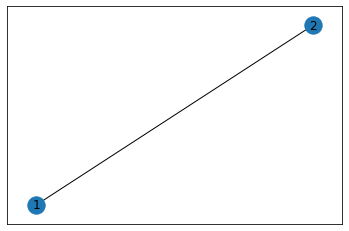

In [0]:
# create an empty undirected graph 
G = nx.Graph()
 
# adding edge in graph G
G.add_edge(1, 2)
#G.add_edge(2, 3)
nx.draw_networkx(G)
plt.show()

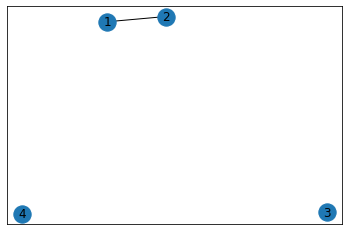

In [0]:
G.add_nodes_from([3,4])
nx.draw_networkx(G)
plt.show()

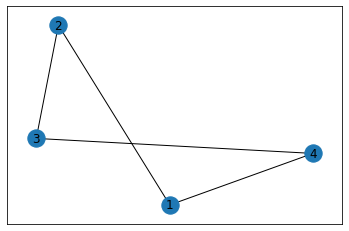

In [0]:
G.add_edge(3,4)
G.add_edges_from([(2,3),(4,1)])
nx.draw_networkx(G)
plt.show()

In [0]:
G.nodes

Out[5]: NodeView((1, 2, 3, 4))

In [0]:
G.edges

Out[6]: EdgeView([(1, 2), (1, 4), (2, 3), (3, 4)])

In [0]:
list(nx.generate_adjlist(G))

Out[7]: ['1 2 4', '2 3', '3 4', '4']

In [0]:
nx.to_dict_of_lists(G)

Out[8]: {1: [2, 4], 2: [1, 3], 3: [4, 2], 4: [3, 1]}

In [0]:
nx.to_edgelist(G)

Out[9]: EdgeDataView([(1, 2, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})])

In [0]:
nx.to_pandas_adjacency(G)

,1,2,3,4
1,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0


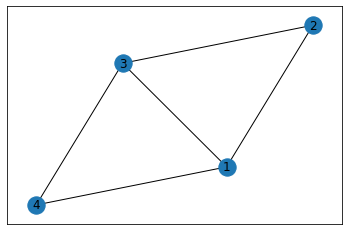

In [0]:
G.add_edge(1,3)
nx.draw_networkx(G)
plt.show()

In [0]:
G.degree

Out[12]: DegreeView({1: 3, 2: 2, 3: 3, 4: 2})

Out[13]: (array([  24.,  268.,  916., 2418., 2787., 2305., 1019.,  220.,   39.,
           4.]),
 array([ 66. ,  73.6,  81.2,  88.8,  96.4, 104. , 111.6, 119.2, 126.8,
        134.4, 142. ]),
 <BarContainer object of 10 artists>)

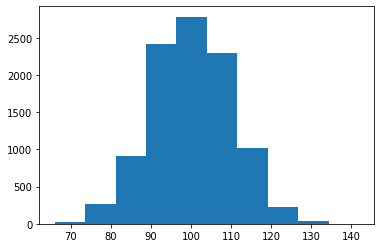

In [0]:
k=nx.fast_gnp_random_graph(10000, 0.01).degree()
plt.hist(list(dict(k).values()))

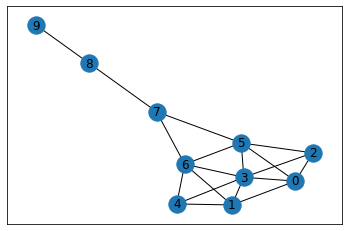

In [0]:
G=nx.krackhardt_kite_graph()
nx.draw_networkx(G)
plt.show()

In [0]:
print(nx.has_path(G,source=1, target=9))
print(nx.shortest_path(G, source=1, target=9))
print(nx.shortest_path_length(G, source=1, target=9))
print(list(nx.shortest_simple_paths(G, source=1, target=9)))
paths=list(nx.all_pairs_shortest_path(G))
paths[5][1]

True
[1, 6, 7, 8, 9]
4
[[1, 6, 7, 8, 9], [1, 0, 5, 7, 8, 9], [1, 6, 5, 7, 8, 9], [1, 3, 5, 7, 8, 9], [1, 4, 6, 7, 8, 9], [1, 3, 6, 7, 8, 9], [1, 0, 2, 5, 7, 8, 9], [1, 0, 5, 6, 7, 8, 9], [1, 6, 3, 5, 7, 8, 9], [1, 3, 5, 6, 7, 8, 9], [1, 4, 3, 5, 7, 8, 9], [1, 4, 6, 5, 7, 8, 9], [1, 3, 0, 5, 7, 8, 9], [1, 3, 6, 5, 7, 8, 9], [1, 0, 3, 5, 7, 8, 9], [1, 4, 3, 6, 7, 8, 9], [1, 3, 2, 5, 7, 8, 9], [1, 0, 3, 6, 7, 8, 9], [1, 3, 4, 6, 7, 8, 9], [1, 0, 2, 3, 5, 7, 8, 9], [1, 0, 2, 5, 6, 7, 8, 9], [1, 0, 5, 3, 6, 7, 8, 9], [1, 6, 4, 3, 5, 7, 8, 9], [1, 6, 3, 0, 5, 7, 8, 9], [1, 4, 3, 5, 6, 7, 8, 9], [1, 4, 6, 3, 5, 7, 8, 9], [1, 3, 0, 2, 5, 7, 8, 9], [1, 3, 0, 5, 6, 7, 8, 9], [1, 0, 3, 5, 6, 7, 8, 9], [1, 4, 3, 0, 5, 7, 8, 9], [1, 4, 3, 6, 5, 7, 8, 9], [1, 3, 2, 0, 5, 7, 8, 9], [1, 3, 2, 5, 6, 7, 8, 9], [1, 0, 3, 2, 5, 7, 8, 9], [1, 0, 3, 6, 5, 7, 8, 9], [1, 3, 4, 6, 5, 7, 8, 9], [1, 0, 2, 3, 6, 7, 8, 9], [1, 6, 3, 2, 5, 7, 8, 9], [1, 4, 3, 2, 5, 7, 8, 9], [1, 0, 3, 4, 6, 7, 8, 9], [1, 0, 2, 3, 5

In [0]:
#importance of node inside the network - centrality
nx.betweenness_centrality(G)


Out[16]: {0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [0]:
nx.degree_centrality(G)

Out[17]: {0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

In [0]:
nx.closeness_centrality(G)

Out[18]: {0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

In [0]:
nx.harmonic_centrality(G)

Out[19]: {0: 6.083333333333333,
 1: 6.083333333333333,
 2: 5.583333333333333,
 3: 7.083333333333333,
 4: 5.583333333333333,
 5: 6.833333333333333,
 6: 6.833333333333333,
 7: 6.0,
 8: 4.666666666666666,
 9: 3.4166666666666665}

In [0]:
nx.eigenvector_centrality(G)

Out[20]: {0: 0.3522089813920359,
 1: 0.3522089813920358,
 2: 0.28583473531632403,
 3: 0.48102048812210046,
 4: 0.28583473531632403,
 5: 0.3976910106255469,
 6: 0.39769101062554685,
 7: 0.19586185175360382,
 8: 0.048074775014202924,
 9: 0.011164058575824235}

In [0]:

nx.clustering(G)

Out[21]: {0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0,
 9: 0}

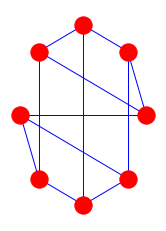

In [0]:
# import matplotlib.pyplot library
import matplotlib.pyplot as plt
 
# create a cubical empty graph
G = nx.cubical_graph()
 
# plotting the graph
plt.subplot(122)
 
# draw a graph with red 
# node and value edge color
nx.draw(G, pos = nx.circular_layout(G), 
        node_color = 'r',
        edge_color = 'b')

In [0]:
# print the adjacent vertices
print(G.adj)

{0: {1: {}, 3: {}, 4: {}}, 1: {0: {}, 2: {}, 7: {}}, 2: {1: {}, 3: {}, 6: {}}, 3: {0: {}, 2: {}, 5: {}}, 4: {0: {}, 5: {}, 7: {}}, 5: {3: {}, 4: {}, 6: {}}, 6: {2: {}, 5: {}, 7: {}}, 7: {1: {}, 4: {}, 6: {}}}


In [0]:
# large graph example Louvain method

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File <command-4016012216069854>:2
      1 # large graph example Louvain method
----> 2 import community

File /databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py:171, in _create_import_patch.<locals>.import_patch(name, globals, locals, fromlist, level)
    166 thread_local._nest_level += 1
    168 try:
    169     # Import the desired module. If you’re seeing this while debugging a failed import,
    170     # look at preceding stack frames for relevant error information.
--> 171     original_result = python_builtin_import(name, globals, locals, fromlist, level)
    173     is_root_import = thread_local._nest_level == 1
    174     # `level` represents the number of leading dots in a relative import statement.
    175     # If it's zero, then this is an absolute import.

ModuleNotFoundError: No module name